# MSDS696 Practicum 2 
## Fall 8W2 2020

### Exploration of Colorado County-Level Voting Patterns 2010 - 2020

#### James D. Reed (jreed011@regis.edu)

<img src="../img/Mountains2.jpg" width="700" height="200" />

## Colorado Voter Registration Data Analysis

The should have already been downloaded from the the Colorado Secretary of State Office.
The data available cover 2004 thru 2020 (2020-10).


In [114]:
import requests
import pandas as pd
import pickle
import xlrd
import openpyxl
from pathlib import Path
import censusFunctions as cf
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from decouple import config
import os
%matplotlib inline

In [4]:
global CENSUS_KEY
global GOOGLE_KEY

def get_census_keys():
    # Get CENSUS_KEY
    try:
        BASE_DIR = os.path.dirname(os.path.abspath(__file__))
    except NameError:  # We are the main py2exe script, not a module
        import sys
        BASE_DIR = os.path.dirname(os.path.abspath(sys.argv[0]))

    CENSUS = config('CENSUS_KEY')
    GOOGLE = config('GOOGLE_KEY')
    #print(f'CENSUS: {CENSUS}, GOOGLE: {GOOGLE}')
    return(CENSUS, GOOGLE)

In [5]:
CENSUS_KEY, GOOGLE_KEY = get_census_keys()
#print(f'CENSUS: {CENSUS_KEY}, GOOGLE: {GOOGLE_KEY}')

In [6]:
counties = ['Adams',  'Alamosa',  'Arapahoe',  'Archuleta',  'Baca',  'Bent', 'Boulder', 
            'Chaffee', 'Cheyenne', 'Clear Creek', 'Conejos', 'Costilla', 
            'Crowley', 'Custer', 'Delta', 'Denver', 'Dolores', 'Douglas', 'Eagle', 'Elbert', 
            'El Paso', 'Fremont', 'Garfield', 'Gilpin', 'Grand', 'Gunnison', 'Hinsdale', 
            'Huerfano', 'Jackson', 'Jefferson', 'Kiowa', 'Kit Carson', 'La Plata', 'Lake', 
            'Larimer', 'Las Animas', 'Lincoln', 'Logan', 'Mesa', 'Mineral', 'Moffat', 
            'Montezuma', 'Montrose', 'Morgan', 'Otero', 'Ouray', 'Park', 'Phillips', 
            'Pitkin', 'Prowers', 'Pueblo', 'Rio Blanco', 'Rio Grande', 'Routt', 'Saguache', 
            'San Juan', 'San Miguel', 'Sedgwick', 'Summit', 'Teller', 'Washington', 
            'Weld', 'Yuma', 'Total'] 

months = {'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,
          'July': 7,'August': 8, 'September': 9,'October': 10,'November': 11,'December': 12}

from os import listdir
from os.path import isfile, join
vr_directory = '../data/raw/vr'

vr_files = [f for f in listdir(vr_directory) if isfile(join(vr_directory, f))]
len(vr_files)
print(f'VR_FILES: \n{vr_files}')

VR_FILES: 
['co-2015-vr-01.xls', 'co-2009-vr-01.xls', 'co-2009-vr-02.xls', 'co-2009-vr-03.xls', 'co-2009-vr-04.xls', 'co-2009-vr-05.xls', 'co-2009-vr-06.xls', 'co-2009-vr-07.xls', 'co-2009-vr-08.xls', 'co-2009-vr-09.xls', 'co-2009-vr-10.xls', 'co-2009-vr-11.xls', 'co-2009-vr-12.xls', 'co-2010-vr-01.xls', 'co-2010-vr-02.xls', 'co-2010-vr-03.xls', 'co-2010-vr-04.xls', 'co-2010-vr-05.xls', 'co-2010-vr-06.xls', 'co-2010-vr-07.xls', 'co-2010-vr-08.xls', 'co-2010-vr-09.xls', 'co-2010-vr-10.xls', 'co-2010-vr-11.xls', 'co-2010-vr-12.xls', 'co-2011-vr-01.xls', 'co-2011-vr-02.xls', 'co-2011-vr-03.xls', 'co-2011-vr-04.xls', 'co-2011-vr-05.xls', 'co-2011-vr-06.xls', 'co-2011-vr-07.xls', 'co-2011-vr-08.xls', 'co-2011-vr-09.xls', 'co-2011-vr-10.xls', 'co-2011-vr-11.xls', 'co-2011-vr-12.xls', 'co-2012-vr-01.xls', 'co-2012-vr-02.xls', 'co-2012-vr-03.xls', 'co-2012-vr-04.xls', 'co-2012-vr-05.xls', 'co-2012-vr-06.xls', 'co-2012-vr-07.xls', 'co-2012-vr-08.xls', 'co-2012-vr-09.xls', 'co-2012-vr-10.xls', '

In [7]:
import requests
import pandas as pd
import censusdata
from pathlib import Path

def get_county(str, month):
    c = str[0:str.index(' County')]
    return(c)

def get_filename(name, census):
    fn = census + '-' + name + '.csv'
    return fn

def get_vr_url(year, month):
    '''
    Construct a string containing url for Year and Month Voter Registration Statistics
    '''
    HOST = "https://www.sos.state.co.us/pubs/elections/VoterRegNumbers"
    
    # Build file URL from year and month
    file_url = "/".join([HOST, str(year), month, "statistics.xlsx"])
    
    return(file_url)

import os
import shutil
import requests

def download_and_rename(url, folder_name,  local_filename):
    #local_filename = url.split('/')[-1]
    path = os.path.join("{}/{}".format(folder_name, local_filename))
    with requests.get(url, stream=True) as r:
        with open(path, 'wb') as f:
            shutil.copyfileobj(r.raw, f)

    return 


def Merge(dict1, dict2):
    return(dict2.update(dict1))


## Read Each of the VR Excel Workbooks, **Status** Tab
### Combine ALL into a Data Frame 

    County, Year, Month, Active, Inactive, Total

In [8]:
def get_xlsx_ncols(fn, sheet_idx = 0):
    import xlrd as xl
    loc = (fn)          #Giving the location of the file 
  
    wb = xl.open_workbook(loc)                   
    s1 = wb.sheet_by_index(sheet_idx)                    
    s1.cell_value(0,0)                           
  
    irows = s1.nrows 
    icols = s1.ncols
    #close(loc)
    return(icols)

In [9]:
# Define dataframe for status detail.
status_df = pd.DataFrame(columns = ['County', 'Date', 'Active', 'Inactive', 'Prereg', 'Total'] )
df5_columns = ['County', 'Active', 'Inactive', 'Prereg', 'Total']
df4_columns = ['County', 'Active', 'Inactive',           'Total']
print(status_df.columns)
print(status_df.shape)

Index(['County', 'Date', 'Active', 'Inactive', 'Prereg', 'Total'], dtype='object')
(0, 6)


In [10]:
%%time
records = []
# Some of the files have five fields instead of just four, so there is logic to open the files and count the number of 
for f, i in zip(vr_files, range(len(vr_files))):
    
    year = int(f.split('-')[1])
    month = int(f.split('-')[3].strip('.xlsx'))
    file_path = vr_directory + '/' + f
    if get_xlsx_ncols(file_path) >= 5:
        df_columns = df5_columns
    else:
        df_columns = df4_columns
        
    df = pd.read_excel(file_path, sheet_name=0, header = None, index_col = None, skiprows = 2, 
                       usecols = range(len(df_columns)), names = df_columns)
    #print(f'file_path: {file_path}')
    for r in range(df.shape[0]):
        if (df.iloc[r,0] != 'Total'):
            rec_dict = {'County': df.iloc[r,0], 'Date': date(year, month, 1)}
            add_dict = {key:value for key,value in zip(df_columns[1:], df.iloc[r,1:])}

            new_dict = {**rec_dict, **add_dict}
            #print(f'NEW: {new_dict}')
            records.append(new_dict)

CPU times: user 4min 4s, sys: 270 ms, total: 4min 4s
Wall time: 4min 4s


In [115]:
df = pd.DataFrame(data=records)
df

,County,Date,Active,Inactive,Prereg,Total
0,Adams,2015-01-01,206404,32347,1203,239954
1,Alamosa,2015-01-01,7321,1468,4,8793
2,Arapahoe,2015-01-01,320620,57940,1994,380554
3,Archuleta,2015-01-01,7710,2165,13,9888
4,Baca,2015-01-01,2438,258,28,2724
...,...,...,...,...,...,...
11978,Summit,2020-10-01,21323,4146,245,25714
11979,Teller,2020-10-01,18996,2906,155,22057
11980,Washington,2020-10-01,3324,339,42,3705
11981,Weld,2020-10-01,197843,18331,2921,219095


In [116]:
df.dtypes
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

# Eliminate invalid data from dataframe (see Example below for more context)
data_cols = ['Active', 'Inactive', 'Prereg', 'Total']
num_df = (df.drop(data_cols, axis=1)
         .join(df[data_cols].apply(pd.to_numeric, errors='coerce')))

num_df = num_df[num_df[data_cols].notnull().all(axis=1)]

In [117]:
df.drop('Prereg', axis=1, inplace = True)
mask =  (df.Total.str.contains('Total')) | \
        (df.Active.str.contains('Total')) | \
        (df.Inactive.str.contains('In')) 

id = df[mask].index
print(id)
df.drop(index = id,inplace=True)

df.columns

Int64Index([64, 131, 197, 263, 8782], dtype='int64')


Index(['County', 'Date', 'Active', 'Inactive', 'Total'], dtype='object')

In [118]:
status_df = df.copy(deep = True)
num_cols = ['Total', 'Active', 'Inactive']
for c in num_cols:
    print(f'c: {c}')
    status_df[c].fillna(0,inplace = True)
    status_df[c].astype(int)

print(f'status_df SHAPE: {status_df.shape}\nstatus_df data types:\n{status_df.dtypes}')

c: Total
c: Active
c: Inactive
status_df SHAPE: (11978, 5)
status_df data types:
County              object
Date        datetime64[ns]
Active             float64
Inactive           float64
Total              float64
dtype: object


/home/jdreed/miniconda3/envs/msds696_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


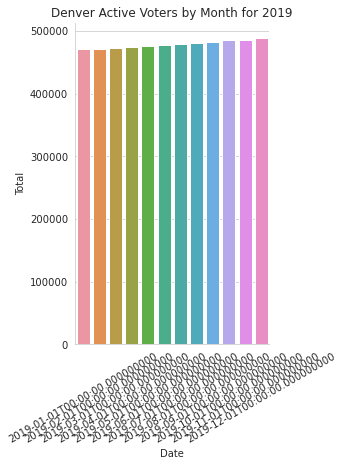

In [120]:
def gen_active_voter_chart(dfi = status_df, County = 'Denver', Year = 2020):
    sns.set_style("whitegrid")
    df = dfi.copy(deep = True)
    by_county = df.groupby('County')
    cdf = by_county.get_group(County)
    
    yr_lst = [d.year for d in cdf['Date']]
    cdf['Year'] = yr_lst

    cdf = cdf.loc[cdf['Year'] == Year,:]
    g = sns.catplot(x = 'Date', y = 'Total', data = cdf, kind = 'bar')
    plt.title(County + " Active Voters by Month for " + str(Year))
    g.set_xticklabels(rotation=30)
    plt.show()
    return
gen_active_voter_chart(status_df, 'Denver', 2019)

In [125]:
import pickle
pickle.dump(status_df, open('../data/processed/co-vr-status.p', "wb"))

## Read Each of the VR Excel Workbooks, **Status & Party** Tab
### Combine All into a Data Frame 

Warning, this does not work quite right now. There is a large variance between file as to number of columns.  This will require preprocessing eachh spreadheet:
 * Delete rows above field names.
 * When reading the subsequent file, use the header and put each field into a dictionary: 'col_hdr": value


In [129]:
import numpy as np
# Define dataframe for status detail.
df_columns =  ['County', 'ACNact', 'DEMact', 'GRNact', 'LBRact', 'REPact', 'UAFact', 'UPAact', 'Totalact',
                         'ACNina', 'DEMina', 'GRNina', 'LBRina', 'REPina', 'UAFina', 'UPAina', 'Totalina']
party_df = pd.DataFrame(columns = df_columns)

print(party_df.columns)
print(party_df.shape)

Index(['County', 'ACNact', 'DEMact', 'GRNact', 'LBRact', 'REPact', 'UAFact',
       'UPAact', 'Totalact', 'ACNina', 'DEMina', 'GRNina', 'LBRina', 'REPina',
       'UAFina', 'UPAina', 'Totalina'],
      dtype='object')
(0, 17)


In [130]:
%%time
records = []
for f, i in zip(vr_files, range(len(vr_files))):
    year = f.split('-')[1]
    month = int(f.split('-')[3].strip('.xlsx'))
    #print(f'year: {year}, month: {month}')
    file_path = vr_directory + '/' + f
    ncols = get_xlsx_ncols(file_path, 1)
    #print(f'FN: {file_path}, NCOLS: {ncols}')
    df = pd.read_excel(file_path, sheet_name=1, header = None, index_col = None, skiprows = 3, 
                       usecols = range(len(df_columns)), names = df_columns)
    if i % 10 == 0:
                print(f' {i} ', end='')
    for r in range(df.shape[0]):
        if (df.iloc[r,0] != 'Total'):
            rec_dict = {'County': df.iloc[r,0], 'Year': year, 'Month': month}
            add_dict = {key:value for key,value in zip(party_df.columns[1:], df.iloc[r,1:])}
            upd_dict = {**rec_dict, **add_dict}
            #print(f'upd_dict: {upd_dict}')
            records.append(upd_dict)

FN: ../data/raw/vr/co-2015-vr-01.xls, NCOLS: 25
 0 FN: ../data/raw/vr/co-2009-vr-01.xls, NCOLS: 19
FN: ../data/raw/vr/co-2009-vr-02.xls, NCOLS: 19
FN: ../data/raw/vr/co-2009-vr-03.xls, NCOLS: 19
FN: ../data/raw/vr/co-2009-vr-04.xls, NCOLS: 19
FN: ../data/raw/vr/co-2009-vr-05.xls, NCOLS: 19
FN: ../data/raw/vr/co-2009-vr-06.xls, NCOLS: 19
FN: ../data/raw/vr/co-2009-vr-07.xls, NCOLS: 19
FN: ../data/raw/vr/co-2009-vr-08.xls, NCOLS: 18
FN: ../data/raw/vr/co-2009-vr-09.xls, NCOLS: 18
FN: ../data/raw/vr/co-2009-vr-10.xls, NCOLS: 18
 10 FN: ../data/raw/vr/co-2009-vr-11.xls, NCOLS: 18
FN: ../data/raw/vr/co-2009-vr-12.xls, NCOLS: 18
FN: ../data/raw/vr/co-2010-vr-01.xls, NCOLS: 18
FN: ../data/raw/vr/co-2010-vr-02.xls, NCOLS: 18
FN: ../data/raw/vr/co-2010-vr-03.xls, NCOLS: 18
FN: ../data/raw/vr/co-2010-vr-04.xls, NCOLS: 18
FN: ../data/raw/vr/co-2010-vr-05.xls, NCOLS: 18
FN: ../data/raw/vr/co-2010-vr-06.xls, NCOLS: 18
FN: ../data/raw/vr/co-2010-vr-07.xls, NCOLS: 18
FN: ../data/raw/vr/co-2010-vr-08.

In [26]:
party_df = pd.DataFrame(data = records)
party_df.fillna(0)
party_df['date'] = str(party_df['Year'])+'-'+str(party_df['Month'])
party_df

,County,Year,Month,ACNact,DEMact,GRNact,LBRact,REPact,UAFact,UPAact,Totalact,ACNina,DEMina,GRNina,LBRina,REPina,UAFina,UPAina,Totalina,date
0,Adams,2015,1,606,73629,409,1650,53774,76324,12,206404.0,118,11507,81,280,6630,13731,NaN,32347,0 2015\n1 2015\n2 2015\n3 ...
1,Alamosa,2015,1,24,2903,17,32,2262,2083,NaN,7321.0,12,494,13,16,322,611,NaN,1468,0 2015\n1 2015\n2 2015\n3 ...
2,Arapahoe,2015,1,700,105197,711,2670,100990,110341,11,320620.0,127,19291,187,572,12170,25592,1,57940,0 2015\n1 2015\n2 2015\n3 ...
3,Archuleta,2015,1,28,1737,26,52,3810,2057,NaN,7710.0,7,503,13,18,815,809,NaN,2165,0 2015\n1 2015\n2 2015\n3 ...
4,Baca,2015,1,10,678,2,12,1179,557,NaN,2438.0,4,47,1,5,93,108,NaN,258,0 2015\n1 2015\n2 2015\n3 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,Summit,2020,10,40,7,6614,84,277,3932,10355,14.0,21323,9,1,1045,20,81,882,2104,0 2015\n1 2015\n2 2015\n3 ...
9111,Teller,2020,10,82,9,2780,44,239,8712,7121,9.0,18996,12,NaN,363,11,46,1300,1173,0 2015\n1 2015\n2 2015\n3 ...
9112,Washington,2020,10,24,3,254,2,32,2241,766,2.0,3324,1,NaN,49,NaN,3,186,99,0 2015\n1 2015\n2 2015\n3 ...
9113,Weld,2020,10,822,201,41833,334,2172,70934,81381,166.0,197843,117,6,3417,53,303,5895,8528,0 2015\n1 2015\n2 2015\n3 ...


ValueError: could not convert string to float: 'DEM'

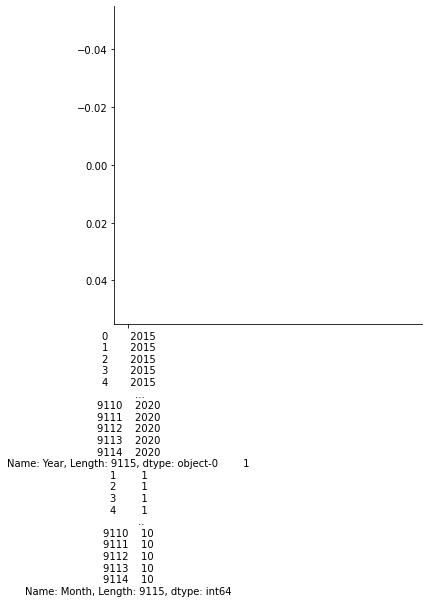

In [25]:
import seaborn as sns

sns.relplot(x = 'date', y = 'DEMact', data = party_df)

In [13]:
pickle.dump(party_df, open('../data/processed/co-registered-voters-by-party.p', "wb"))

## Read Each of the VR Excel Workbooks, **Gender & Status** Tab
### Combine All into a Data Frame 


In [14]:
import numpy as np
# Define dataframe for status detail.
gs_columns =  ['County', 'Year', 'Month', 'FemaleAct', 'MaleAct', 'UnknownAct', 'TotalAct', 'FemaleIna', 'MaleIna', 'UnknownIna', 'TotalIna']
               
gs_df = pd.DataFrame(columns = gs_columns)

print(gs_df.columns)
print(gs_df.shape)

Index(['County', 'Year', 'Month', 'FemaleAct', 'MaleAct', 'UnknownAct',
       'TotalAct', 'FemaleIna', 'MaleIna', 'UnknownIna', 'TotalIna'],
      dtype='object')
(0, 11)


In [15]:
import math
#%%time
records = []

for f, i in zip(vr_files, range(len(vr_files))):
    year = f.split('-')[1]
    month = int(f.split('-')[3].strip('.xlsx'))
    #print(f'File:  {f}, Month: {month}, Year: {year}')
    file_path = vr_directory + '/' + f
    df = pd.read_excel(file_path, sheet_name=3, header = None, index_col = None, skiprows = [0,1,2], 
                       usecols = range(len(gs_columns)), names = gs_columns)
    if i % 10 == 0: print(f' {i} ', end='')
    county_abv = ''
    for r in range(df.shape[0]):
        rec_dict = {'County': df.iloc[r,0], 'Year': year, 'Month': month} 
        add_dict = {key:value for key, value in zip(gs_columns[3:], df.iloc[r,1:])}
        upd_dict = {**rec_dict, **add_dict}
        records.append(upd_dict)

 0  10  20  30  40  50  60  70  80  90  100  110  120  130  140 

In [132]:
gs_df = pd.DataFrame(data = records)
gs_df.fillna(0)
gs_df

,County,Year,Month,ACNact,DEMact,GRNact,LBRact,REPact,UAFact,UPAact,Totalact,ACNina,DEMina,GRNina,LBRina,REPina,UAFina,UPAina,Totalina
0,Adams,2015,1,606,73629,409,1650,53774,76324,12,206404.0,118,11507,81,280,6630,13731,NaN,32347
1,Alamosa,2015,1,24,2903,17,32,2262,2083,NaN,7321.0,12,494,13,16,322,611,NaN,1468
2,Arapahoe,2015,1,700,105197,711,2670,100990,110341,11,320620.0,127,19291,187,572,12170,25592,1,57940
3,Archuleta,2015,1,28,1737,26,52,3810,2057,NaN,7710.0,7,503,13,18,815,809,NaN,2165
4,Baca,2015,1,10,678,2,12,1179,557,NaN,2438.0,4,47,1,5,93,108,NaN,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,Summit,2020,10,40,7,6614,84,277,3932,10355,14.0,21323,9,1,1045,20,81,882,2104
9111,Teller,2020,10,82,9,2780,44,239,8712,7121,9.0,18996,12,NaN,363,11,46,1300,1173
9112,Washington,2020,10,24,3,254,2,32,2241,766,2.0,3324,1,NaN,49,NaN,3,186,99
9113,Weld,2020,10,822,201,41833,334,2172,70934,81381,166.0,197843,117,6,3417,53,303,5895,8528


In [133]:
pickle.dump(gs_df, open('../data/processed/co-registered-voters-by-gender.p', "wb"))

In [134]:
from datetime import date
print(f'Complete: {date.today()}')

Complete: 2020-11-23
